# このテキストについて
### テキストの目的
・教師あり学習（分類問題）の概観を知る\
・scikit-laernを使い分類を行えるようにする\
・手法の簡単な比較をする

### どのように学ぶか
定番のデータセットを通じて、分類問題を解く流れやライブラリの使い方を学びます。

# アヤメの分類

Week3で使用したirisデータセットを使い、分類問題を解く練習をします。\
irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

・Iris setosa - Wikipedia \
・Iris virgicolor - Wikipedia \
・Iris virginica - Wikipedia

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。\
アヤメの種類を分類するので、こういったものを分類問題と呼びます。

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。\
それぞれの手法についての詳細は今の段階では扱いません。\
ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

・最近傍法 \
・ロジスティック回帰 \
・SVM \
・決定木 \
・ランダムフォレスト

# 分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。\
課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。\
今回の課題では大まかな流れの把握を行ってください。

### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。\
こうすることで2次元の散布図を描き確認することができます。\
また、問題を単純化するためアヤメの種類を2つだけ使うことにします。\
分類対象が2種類の場合を2値分類と呼び、それ以上の多値分類とは区別をします。\
それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。\
irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

・virgicolorとvirginica\
・sepal_lengthとpetal_length

《実際の問題では？》\
実際の問題を解く上でも結果の可視化は有効です。\
しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。\
そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を\
適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
# 利用するライブラリをimportする。
import numpy as np
import matplotlib.pyplot as plt
import pandas as pld
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#irisデータセットを読み込む。
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
#説明変数(feature_names)をXに格納する。
X = pld.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#目的変数(target)をyに格納する。
y = pld.DataFrame(iris_dataset.target, columns=["Species"])
display(y)

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
# X,yを結合させたDataFrame型変数dfを作成する。
df = X.join(y)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# 目的変数であるSpeciesが数値であるため名称の分かる列をいれる。
df['Species name']=0
display(df)
df.loc[df['Species'] == 0, 'Species name'] = 'setosa'
df.loc[df['Species'] == 1, 'Species name'] = 'virsicolor'
df.loc[df['Species'] == 2, 'Species name'] = 'virginica'
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species name
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
# データフレームからvirsicolorとvirginicaとsepal_lengthとpetal_lengthを抜き出す。
# VergicolorはSpecies列における1、Virginicaは2。それらだけ抜き出す。
df_extracted = df.query('Species == 1 or Species == 2')
display(df_extracted)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species name
50,7.0,3.2,4.7,1.4,1,virsicolor
51,6.4,3.2,4.5,1.5,1,virsicolor
52,6.9,3.1,4.9,1.5,1,virsicolor
53,5.5,2.3,4.0,1.3,1,virsicolor
54,6.5,2.8,4.6,1.5,1,virsicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
# sepal_lengthとpetal_lengthのみ抜き出す。
df_extracted = df_extracted.loc[:,['sepal length (cm)','petal length (cm)','Species','Species name']]
display(df_extracted)

,sepal length (cm),petal length (cm),Species,Species name
50,7.0,4.7,1,virsicolor
51,6.4,4.5,1,virsicolor
52,6.9,4.9,1,virsicolor
53,5.5,4.0,1,virsicolor
54,6.5,4.6,1,virsicolor
...,...,...,...,...
145,6.7,5.2,2,virginica
146,6.3,5.0,2,virginica
147,6.5,5.2,2,virginica
148,6.2,5.4,2,virginica


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。\
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。\
sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。\
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

《実際の問題では？》
このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。\
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

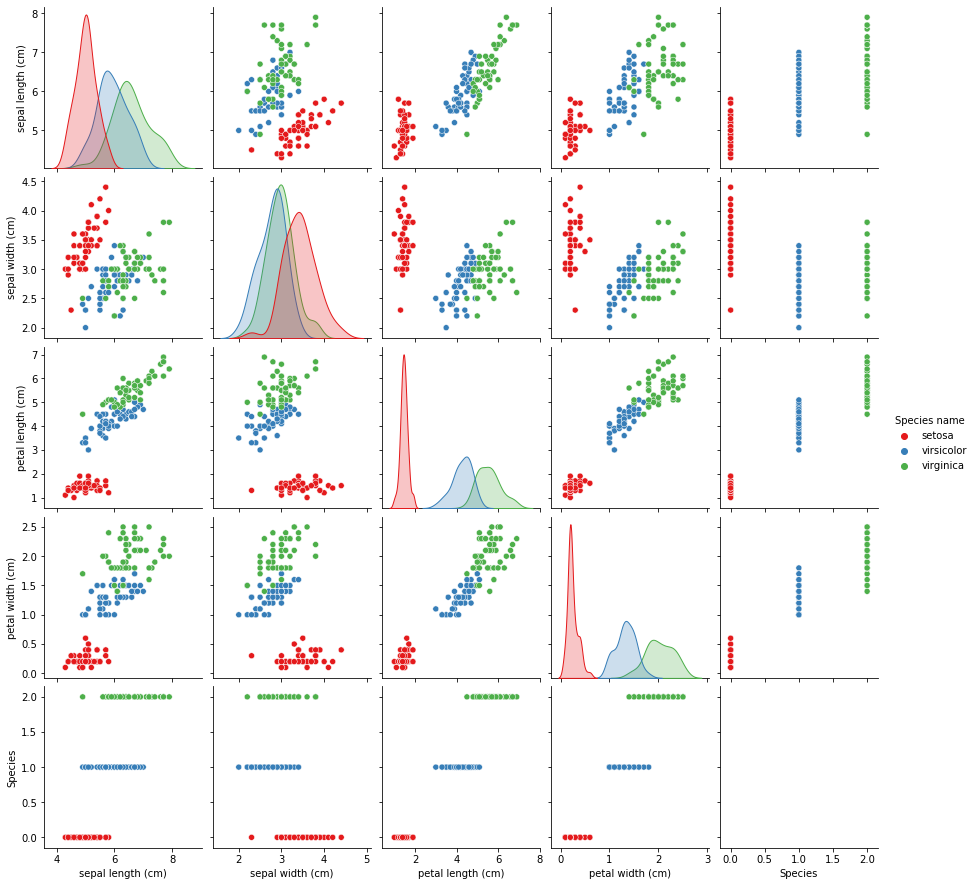

sepal_lengthとpetal_lengthの状況は1行3列目。
virgicolorとvirginicaはそれぞれ青色と緑色。
青色と緑色はpetal_lengthの5cmあたりで重なっており、分類が難しいことが分かる。


In [9]:
# 散布図行列を見る。
sns.pairplot(data=df, hue="Species name", palette='Set1')
plt.show()
print("sepal_lengthとpetal_lengthの状況は1行3列目。")
print("virgicolorとvirginicaはそれぞれ青色と緑色。")
print("青色と緑色はpetal_lengthの5cmあたりで重なっており、分類が難しいことが分かる。")

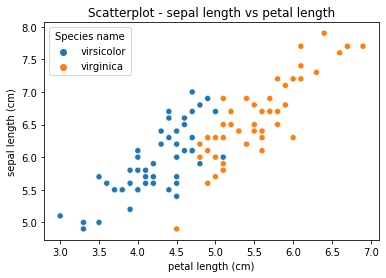

In [10]:
# 散布図を見る。
sns.scatterplot(data=df_extracted, x='petal length (cm)', y='sepal length (cm)', hue="Species name")
plt.title("Scatterplot - sepal length vs petal length")
plt.show()

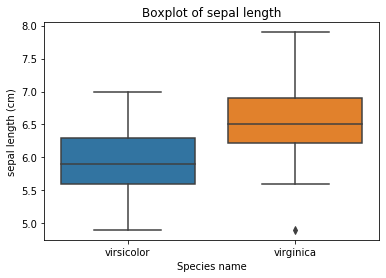

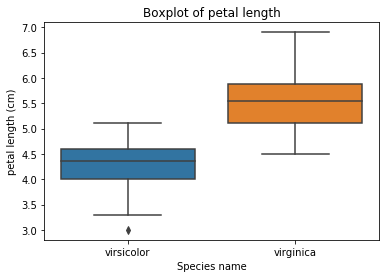

In [11]:
# 箱ひげ図をみる
sns.boxplot(data=df_extracted, x="Species name", y = 'sepal length (cm)')
plt.title("Boxplot of sepal length")
plt.show()
plt.title("Boxplot of petal length")
sns.boxplot(data=df_extracted, x="Species name", y = 'petal length (cm)')
plt.show()

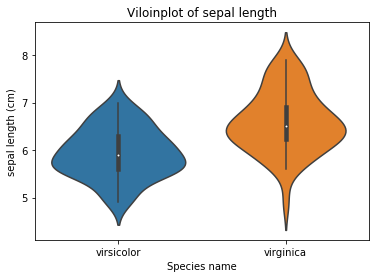

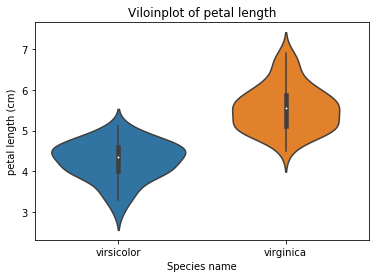

In [12]:
# バイオリン図をみる
sns.violinplot(data=df_extracted, x="Species name", y = 'sepal length (cm)')
plt.title("Viloinplot of sepal length")
plt.show()
sns.violinplot(data=df_extracted, x="Species name", y = 'petal length (cm)')
plt.title("Viloinplot of petal length")
plt.show()

# 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。\
今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。\
公式ドキュメントのExamplesを参考に動かしてください。

・sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》\
データの分析まではPandasのDataFrameを使用してきました。\
しかし、scikit-learnはNumPyのndarrayを想定して作られています。\
そのため、この段階でndarrayへの変換を行いましょう。\
特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》
分類問題の目的は未知のデータを正しく分類することです。\
その目的が達成できているかを確認するため、実際には\
答えの分かっているデータの一部を学習には使わず残しておきます。\
この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。\
学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。



In [13]:
# DataFrameをndarrayへ変換する。
ndarray_extracted = df_extracted.to_numpy()
print(ndarray_extracted)

# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納する。
X = ndarray_extracted[:,0:2]
y = ndarray_extracted[:,2]
print(X)
print(y)

[[7.0 4.7 1 'virsicolor']
 [6.4 4.5 1 'virsicolor']
 [6.9 4.9 1 'virsicolor']
 [5.5 4.0 1 'virsicolor']
 [6.5 4.6 1 'virsicolor']
 [5.7 4.5 1 'virsicolor']
 [6.3 4.7 1 'virsicolor']
 [4.9 3.3 1 'virsicolor']
 [6.6 4.6 1 'virsicolor']
 [5.2 3.9 1 'virsicolor']
 [5.0 3.5 1 'virsicolor']
 [5.9 4.2 1 'virsicolor']
 [6.0 4.0 1 'virsicolor']
 [6.1 4.7 1 'virsicolor']
 [5.6 3.6 1 'virsicolor']
 [6.7 4.4 1 'virsicolor']
 [5.6 4.5 1 'virsicolor']
 [5.8 4.1 1 'virsicolor']
 [6.2 4.5 1 'virsicolor']
 [5.6 3.9 1 'virsicolor']
 [5.9 4.8 1 'virsicolor']
 [6.1 4.0 1 'virsicolor']
 [6.3 4.9 1 'virsicolor']
 [6.1 4.7 1 'virsicolor']
 [6.4 4.3 1 'virsicolor']
 [6.6 4.4 1 'virsicolor']
 [6.8 4.8 1 'virsicolor']
 [6.7 5.0 1 'virsicolor']
 [6.0 4.5 1 'virsicolor']
 [5.7 3.5 1 'virsicolor']
 [5.5 3.8 1 'virsicolor']
 [5.5 3.7 1 'virsicolor']
 [5.8 3.9 1 'virsicolor']
 [6.0 5.1 1 'virsicolor']
 [5.4 4.5 1 'virsicolor']
 [6.0 4.5 1 'virsicolor']
 [6.7 4.7 1 'virsicolor']
 [6.3 4.4 1 'virsicolor']
 [5.6 4.1 1 

In [14]:
# train_test_splitで分割する。
print("X:{}".format(X.shape))
print("y:{}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=3)
print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))


X:(100, 2)
y:(100,)
X_train:(75, 2)
X_test:(25, 2)
y_train:(75,)
y_test:(25,)


# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。\
手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。\
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

・sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》\
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。\
検証データは学習の段階には存在しない未知のデータの代わりなので、\
標準化のための平均や標準偏差の計算に使ってはいけません。\
また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


《実際の問題での前処理は？》\
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。\
分析を行いながら、さまざまな加工が必要になってきます。\
例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補完も行います。\
外れ値の確認や、複数のデータセットの整理などもあります。

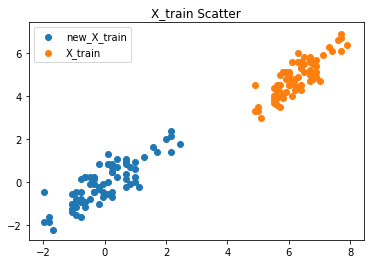

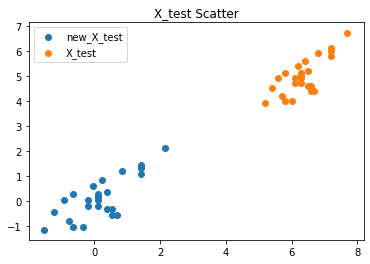

In [15]:
# データを標準化する。
scaler = StandardScaler()
scaler.fit(X_train)
new_X_train = scaler.transform(X_train)
new_X_test = scaler.transform(X_test)

# 標準化前後で比較する。
plt.scatter(new_X_train[:, 0], new_X_train[:, 1],label="new_X_train")
plt.scatter(X_train[:,0],X_train[:,1],label="X_train")
plt.legend()
plt.title("X_train Scatter")
plt.show()

plt.scatter(new_X_test[:, 0], new_X_test[:, 1],label="new_X_test")
plt.scatter(X_test[:,0],X_test[:,1],label="X_test")
plt.legend()
plt.title("X_test Scatter")
plt.show()

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。\
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。\
ここで入力するのは訓練データです。

・sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。\
パラメータが複数ありますが、今はそれらの理解を重視しません。\
最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。\
デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

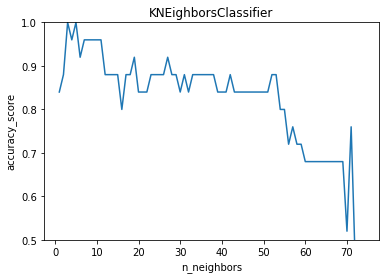

In [16]:
#最近傍法(KNEighborsClassifier)を使う。n_neighborsをkとして一番良いkを探す。
list_nn = []
list_score = []
for k in range(1, 75): #1～75まで行う。
  # KNeighborsClassifierを使う。
  knc = KNeighborsClassifier(n_neighbors=k)
    
  # 標準化したnew_X_trainとy_trainで学習する。
  knc.fit(new_X_train.astype(float), y_train.astype(float))

  # 標準化したnew_X_trainからyを推定する。
  y_pred = knc.predict(new_X_test.astype(float))

  # 推定したy_predをaccuracy_scoreを使って評価する。
  score = accuracy_score(y_test.astype(float), y_pred.astype(float))

  list_nn.append(k)
  list_score.append(score)

# プロットする。
plt.ylim(0.5, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy_score")
plt.plot(list_nn, list_score)
plt.title("KNEighborsClassifier")
plt.show()


# 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


scikit-learnを使い4種類の指標を計算する
混同行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる

・sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation\
・sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation\
・sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation\
・sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation\
・sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation



C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


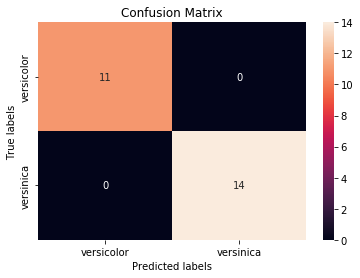

In [17]:
# まずは混同行列をみる。

# n_neighbors=5で作成する。
knc = KNeighborsClassifier(n_neighbors=5)
# 標準化したnew_X_trainとy_trainで学習する。
knc.fit(new_X_train.astype(float), y_train.astype(float))
# 標準化したnew_X_trainからyを推定する。
y_pred = knc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

In [18]:
from sklearn.metrics import accuracy_score
print("accuracy_score: {}" .format(accuracy_score(y_test.astype(float), y_pred.astype(float))))
print("計算式：(15+7)÷(15+1+2+7)")

accuracy_score: 1.0
計算式：(15+7)÷(15+1+2+7)


In [19]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(float), y_pred.astype(float)))
print("9÷(9+1)")

1.0
9÷(9+1)


In [20]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(float), y_pred.astype(float)))
print("9÷(9+1)")

1.0
9÷(9+1)


In [21]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(float), y_pred.astype(float)))
print("(2×Precision×Recall)÷(Precision+Recall)")

1.0
(2×Precision×Recall)÷(Precision+Recall)


In [22]:
# Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値を計算する。
list_nn = []
list_score = []
names = [
    "k", 
    "test_accuracy_score", 
    "test_precision_score", 
    "test_recall_score", 
    "test_f1_score"]

for k in range(1, 75): #1～75まで行う。
  # KNeighborsClassifierを使う。
  knc = KNeighborsClassifier(n_neighbors=k)
    
  # 標準化したnew_X_trainとy_trainで学習する。
  knc.fit(new_X_train.astype(float), y_train.astype(float))

  # 標準化したnew_X_trainからyを推定する。
  y_pred = knc.predict(new_X_test.astype(float))

  # 推定したy_predを各指標を使って評価し格納する。
  list_score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
  list_score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
  list_score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
  list_score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

  list_nn.append(k)

# list_scoreを見やすくする
list_nn = np.array(list_nn)
print(list_nn.shape)
list_nn = list_nn.reshape(-1,1)
print(list_nn.shape)

list_score = np.array(list_score)
print(list_score.shape)
list_score = list_score.reshape(-1,4)
print(list_score.shape)

list_score = pld.DataFrame(np.hstack((list_nn,list_score)),columns=names)
display(list_score)


(74,)
(74, 1)
(296,)
(74, 4)


,k,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
0,1.0,0.84,0.769231,0.909091,0.833333
1,2.0,0.88,0.785714,1.000000,0.880000
2,3.0,1.00,1.000000,1.000000,1.000000
3,4.0,0.96,0.916667,1.000000,0.956522
4,5.0,1.00,1.000000,1.000000,1.000000
...,...,...,...,...,...
69,70.0,0.52,0.478261,1.000000,0.647059
70,71.0,0.76,0.647059,1.000000,0.785714
71,72.0,0.44,0.440000,1.000000,0.611111
72,73.0,0.44,0.440000,1.000000,0.611111


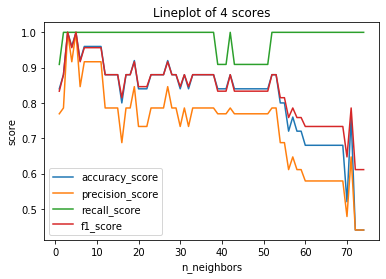

In [23]:
# 指標の推移を視覚化する。
sns.lineplot(data=list_score, x="k",y="test_accuracy_score",label="accuracy_score")
sns.lineplot(data=list_score, x="k",y="test_precision_score",label="precision_score")
sns.lineplot(data=list_score, x="k",y="test_recall_score",label="recall_score")
sns.lineplot(data=list_score, x="k",y="test_f1_score",label="f1_score")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Lineplot of 4 scores")
plt.show()

# 【問題7】可視化
評価の一貫として可視化を行います。\
今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。\
以下にどう分割するかという決定領域を描く関数を用意しました。\
これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

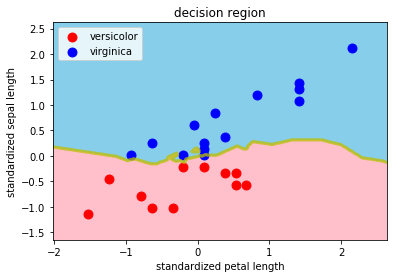

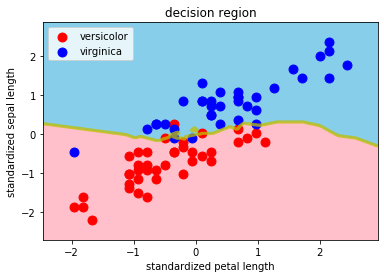

In [25]:
# n_neighbors=5で作成する。
knc = KNeighborsClassifier(n_neighbors=5)
# 標準化したnew_X_trainとy_trainで学習する。
knc.fit(new_X_train.astype(float), y_train.astype(float))
# 標準化したnew_X_trainからyを推定する。
y_pred = knc.predict(new_X_test.astype(float))

#可視化する。
decision_region(X=new_X_test,y=y_test,model=knc,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=knc,xlabel="standardized petal length",ylabel="standardized sepal length")

# 【問題8】他の手法の学習
以下のすべての手法について学習・推定・評価・可視化を行ってください。\
そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。\
どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

・最近傍法\
・ロジスティック回帰\
・SVM\
・決定木\
・ランダムフォレスト

公式ドキュメントへのリンクは以下です。\
それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。\
まずはデフォルトの値で実行してください。

・sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation\
・sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation\
・sklearn.svm.SVC — scikit-learn 0.21.3 documentation\
・sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation\
・sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

《実際の問題では？》\
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


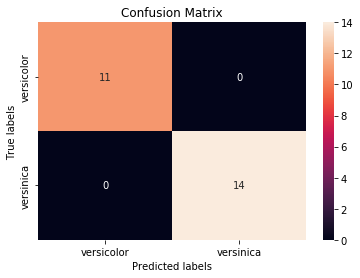

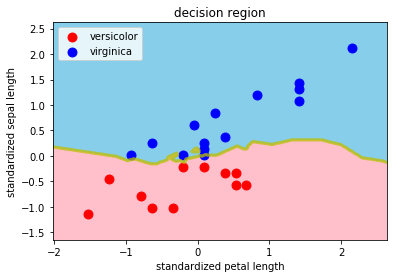

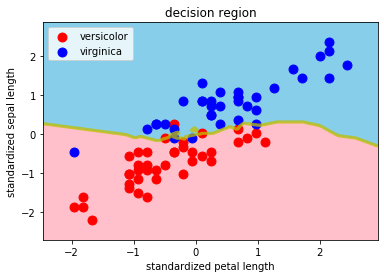

In [26]:
#最近傍法を使う。
# LogisticRegressionを使う。
knc = KNeighborsClassifier()
   
# 標準化したnew_X_trainとy_trainで学習する。
knc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = knc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

list_5score =[]
list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

decision_region(X=new_X_test,y=y_test,model=knc,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=knc,xlabel="standardized petal length",ylabel="standardized sepal length")

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


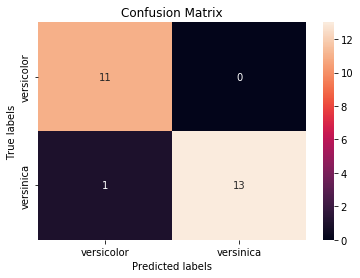

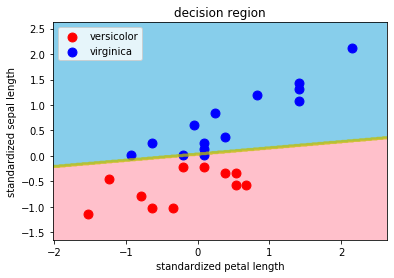

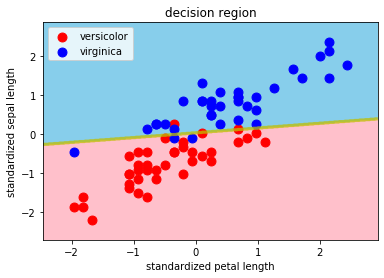

In [27]:
#ロジスティック回帰を使う。
from sklearn.linear_model import LogisticRegression

# LogisticRegressionを使う。
lr = LogisticRegression()
   
# 標準化したnew_X_trainとy_trainで学習する。
lr.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = lr.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

decision_region(X=new_X_test,y=y_test,model=lr,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=lr,xlabel="standardized petal length",ylabel="standardized sepal length")

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


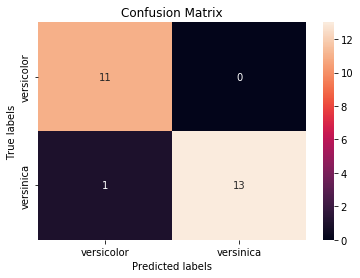

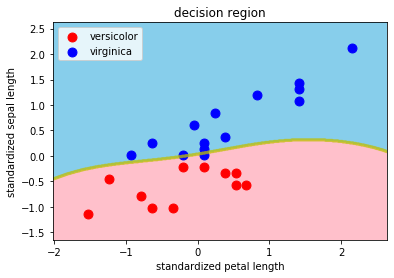

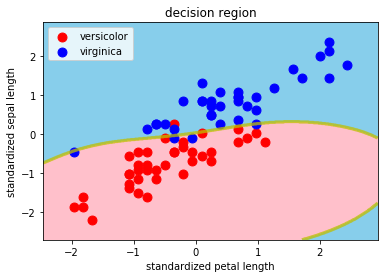

In [28]:
# SVCを使う。
from sklearn.svm import SVC

# SVCを使う。
svc = SVC(gamma='scale')

# 標準化したnew_X_trainとy_trainで学習する。
svc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = svc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

decision_region(X=new_X_test,y=y_test,model=svc,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=svc,xlabel="standardized petal length",ylabel="standardized sepal length")

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


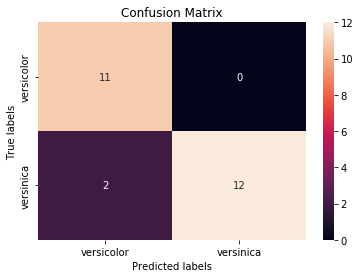

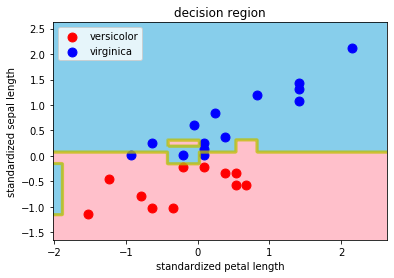

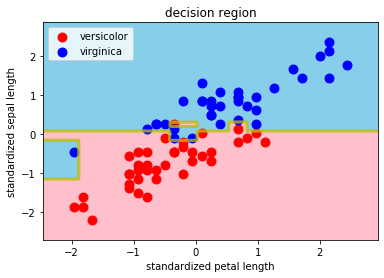

In [29]:
# 決定木を使う。
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 決定木を使う。
dtc = DecisionTreeClassifier(max_depth=10)

# 標準化したnew_X_trainとy_trainで学習する。
dtc.fit(new_X_train.astype(float), y_train.astype(float))


# 標準化したnew_X_trainからyを推定する。
y_pred = dtc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

decision_region(X=new_X_test,y=y_test,model=dtc,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=dtc,xlabel="standardized petal length",ylabel="standardized sepal length")

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


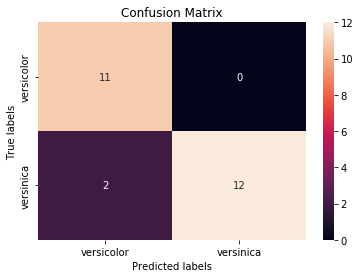

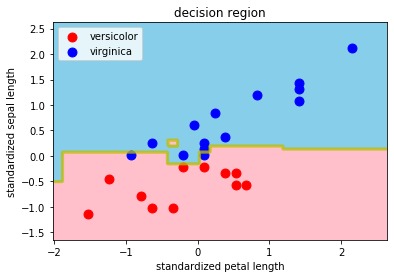

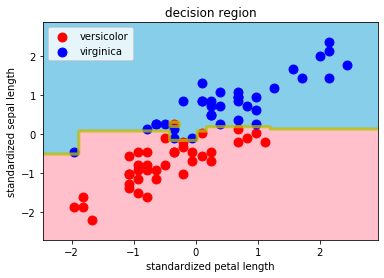

In [30]:
# ランダムフォレストを使う。
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストを使う。
rfc = RandomForestClassifier(random_state=12)

# 標準化したnew_X_trainとy_trainで学習する。
rfc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = rfc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

plt.show()

list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

decision_region(X=new_X_test,y=y_test,model=rfc,xlabel="standardized petal length",ylabel="standardized sepal length")
decision_region(X=new_X_train,y=y_train,model=rfc,xlabel="standardized petal length",ylabel="standardized sepal length")

In [31]:
# list_5scoreを見やすくする
list_5score = np.array(list_5score)
print(list_5score.shape)
list_5score = list_5score.reshape(-1,4)
print(list_5score.shape)
names=[
    "test_accuracy_score", 
    "test_precision_score", 
    "test_recall_score", 
    "test_f1_score"]

index=[
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier"]

list_5score = pld.DataFrame(list_5score,columns=names,index=index)
display(list_5score)

(20,)
(5, 4)


,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
KNeighborsClassifier,1.00,1.000000,1.0,1.000000
LogisticRegression,0.96,0.916667,1.0,0.956522
SVC,0.96,0.916667,1.0,0.956522
DecisionTreeClassifier,0.92,0.846154,1.0,0.916667
RandomForestClassifier,0.92,0.846154,1.0,0.916667


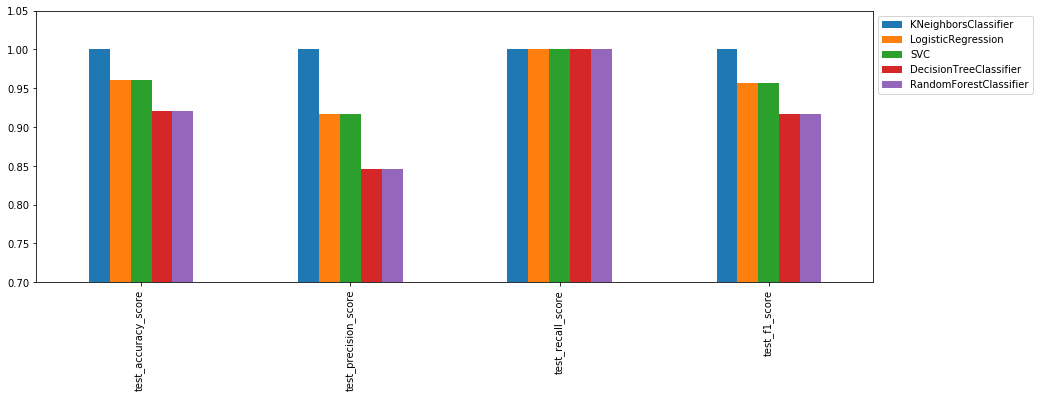

In [32]:
# 指標の推移を視覚化する。
list_5score.T.plot(kind="bar",figsize=(15,5)) # スコア毎に棒グラフを表示
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(0.7,1.05)
plt.show()

# 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。\
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。\
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

===標準化なし===


,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
KNeighborsClassifier,1.00,1.000000,1.0,1.000000
LogisticRegression,0.92,0.846154,1.0,0.916667
SVC,0.96,0.916667,1.0,0.956522
DecisionTreeClassifier,0.92,0.846154,1.0,0.916667
RandomForestClassifier,0.92,0.846154,1.0,0.916667


===標準化あり===


,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
KNeighborsClassifier,1.00,1.000000,1.0,1.000000
LogisticRegression,0.96,0.916667,1.0,0.956522
SVC,0.96,0.916667,1.0,0.956522
DecisionTreeClassifier,0.92,0.846154,1.0,0.916667
RandomForestClassifier,0.92,0.846154,1.0,0.916667





===標準化なし===


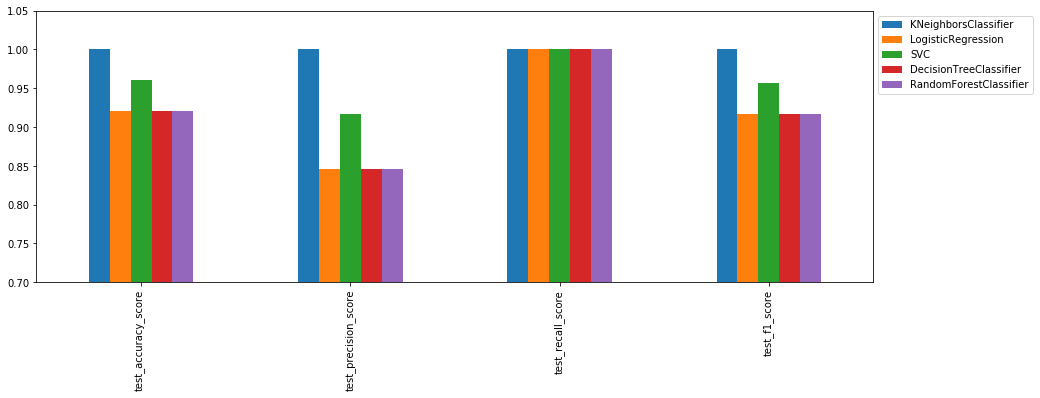

===標準化あり===


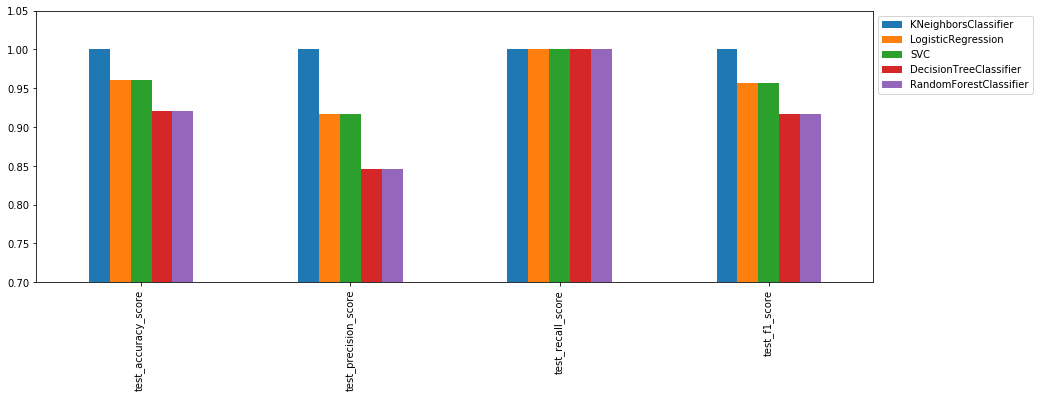

In [33]:
#最近傍法を使う。
knc = KNeighborsClassifier()
knc.fit(X_train.astype(float), y_train.astype(float))#標準化なしを使う。
y_pred = knc.predict(X_test.astype(float))

no_s_list_5score =[]
no_s_list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

#ロジスティック回帰を使う。
lr = LogisticRegression()
lr.fit(X_train.astype(float), y_train.astype(float))
y_pred = lr.predict(X_test.astype(float))

no_s_list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

# SVCを使う。
svc = SVC(gamma='scale')
svc.fit(X_train.astype(float), y_train.astype(float))#標準化なしを使う。
y_pred = svc.predict(X_test.astype(float))

no_s_list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

# 決定木を使う。
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train.astype(float), y_train.astype(float))#標準化なしを使う。
y_pred = dtc.predict(X_test.astype(float))

no_s_list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))


# ランダムフォレストを使う。
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(X_train.astype(float), y_train.astype(float))#標準化なしを使う。
y_pred = rfc.predict(X_test.astype(float))

no_s_list_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(precision_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(recall_score(y_test.astype(float), y_pred.astype(float)))
no_s_list_5score.append(f1_score(y_test.astype(float), y_pred.astype(float)))

# list_5scoreを見やすくする
no_s_list_5score = np.array(no_s_list_5score)
no_s_list_5score = no_s_list_5score.reshape(-1,4)
names=[
    "test_accuracy_score", 
    "test_precision_score", 
    "test_recall_score", 
    "test_f1_score"]

index=[
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier"]

#pandasで表示
no_s_list_5score = pld.DataFrame(no_s_list_5score,columns=names,index=index)
print("===標準化なし===")
display(no_s_list_5score)

print("===標準化あり===")
display(list_5score)

print("")
print("")
print("")

# 指標の推移を視覚化する。
print("===標準化なし===")
no_s_list_5score.T.plot(kind="bar",figsize=(15,5)) # スコア毎に棒グラフを表示
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(0.7,1.05)
plt.show()

print("===標準化あり===")
list_5score.T.plot(kind="bar",figsize=(15,5)) # スコア毎に棒グラフを表示
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(0.7,1.05)
plt.show()

In [34]:
print("標準化ありの方が精度のあがっているところ指標がある。")

標準化ありの方が精度のあがっているところ指標がある。


# 【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類すべてを使った多値分類を行います。\
学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》\
指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。\
マイクロ平均やマクロ平均という考え方を使います。\
決定領域を可視化する前述の関数は適切に書き換える必要があります。

In [35]:
#多値分類用のデータを準備する。
df_extracted = df.loc[:,['sepal length (cm)','petal length (cm)','Species','Species name']]
display(df_extracted)

,sepal length (cm),petal length (cm),Species,Species name
0,5.1,1.4,0,setosa
1,4.9,1.4,0,setosa
2,4.7,1.3,0,setosa
3,4.6,1.5,0,setosa
4,5.0,1.4,0,setosa
...,...,...,...,...
145,6.7,5.2,2,virginica
146,6.3,5.0,2,virginica
147,6.5,5.2,2,virginica
148,6.2,5.4,2,virginica


In [36]:
# DataFrameをndarrayへ変換する。
ndarray_extracted = df_extracted.to_numpy()

# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納する。
X = ndarray_extracted[:,0:2]
y = ndarray_extracted[:,2]

# train_test_splitで分割する。
print("X:{}".format(X.shape))
print("y:{}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=3)
print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))

X:(150, 2)
y:(150,)
X_train:(112, 2)
X_test:(38, 2)
y_train:(112,)
y_test:(38,)


In [37]:
# データを標準化する。
scaler = StandardScaler()
scaler.fit(X_train)
new_X_train = scaler.transform(X_train)
new_X_test = scaler.transform(X_test)

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


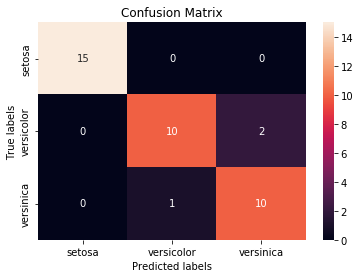

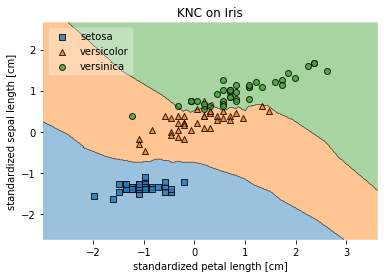

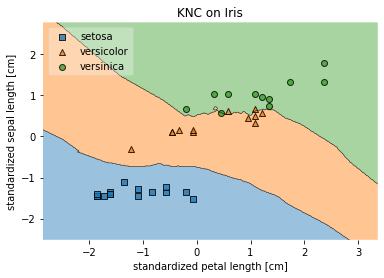

In [38]:


#最近傍法を使う。
# LogisticRegressionを使う。
knc = KNeighborsClassifier()
   
# 標準化したnew_X_trainとy_trainで学習する。
knc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = knc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["setosa",'versicolor', 'versinica'])
ax.yaxis.set_ticklabels(["setosa",'versicolor','versinica'])

plt.show()


from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=new_X_train.astype(float),y=y_train.astype(int), clf=knc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('KNC on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

ax = plot_decision_regions(X=new_X_test.astype(float),y=y_test.astype(int), clf=knc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('KNC on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

list3_5score =[]
list3_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list3_5score.append(precision_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(recall_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(f1_score(y_test.astype(float), y_pred.astype(float),average="macro"))

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


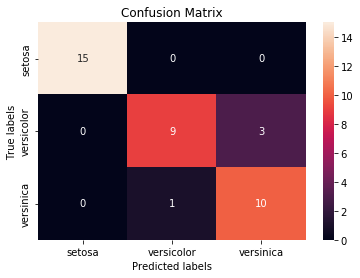

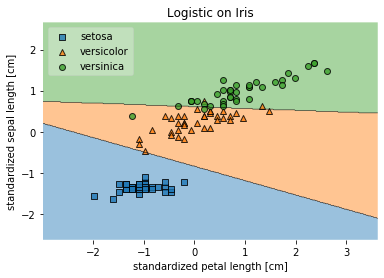

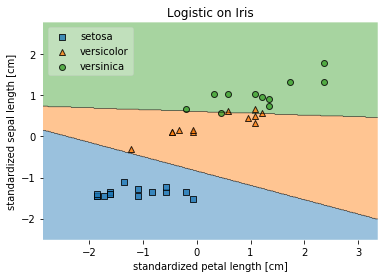

In [39]:
#ロジスティクス回帰を使う。
lr = LogisticRegression()
   
# 標準化したnew_X_trainとy_trainで学習する。
lr.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = lr.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["setosa",'versicolor', 'versinica'])
ax.yaxis.set_ticklabels(["setosa",'versicolor','versinica'])

plt.show()


from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=new_X_train.astype(float),y=y_train.astype(int), clf=lr)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

ax = plot_decision_regions(X=new_X_test.astype(float),y=y_test.astype(int), clf=lr)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

list3_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list3_5score.append(precision_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(recall_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(f1_score(y_test.astype(float), y_pred.astype(float),average="macro"))

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


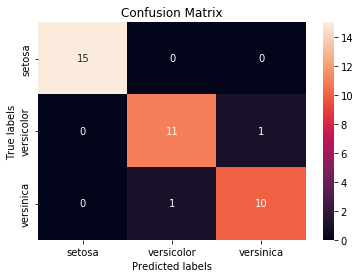

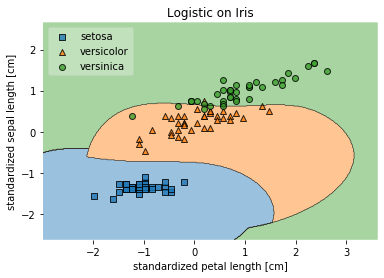

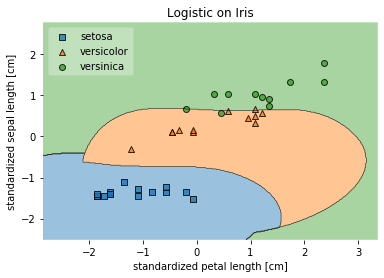

In [40]:
# SVCを使う。
svc = SVC(gamma='scale')   
# 標準化したnew_X_trainとy_trainで学習する。
svc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = svc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["setosa",'versicolor', 'versinica'])
ax.yaxis.set_ticklabels(["setosa",'versicolor','versinica'])

plt.show()


from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=new_X_train.astype(float),y=y_train.astype(int), clf=svc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

ax = plot_decision_regions(X=new_X_test.astype(float),y=y_test.astype(int), clf=svc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

list3_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list3_5score.append(precision_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(recall_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(f1_score(y_test.astype(float), y_pred.astype(float),average="macro"))

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


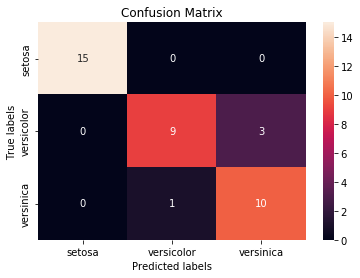

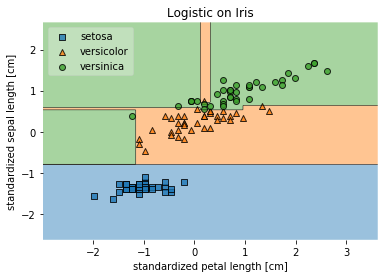

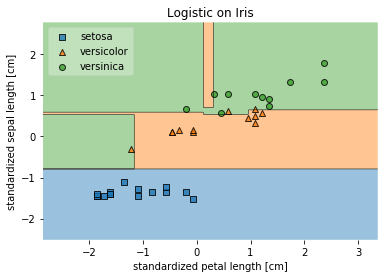

In [41]:
# 決定木を使う。
dtc = DecisionTreeClassifier(max_depth=10)
# 標準化したnew_X_trainとy_trainで学習する。
dtc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = dtc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["setosa",'versicolor', 'versinica'])
ax.yaxis.set_ticklabels(["setosa",'versicolor','versinica'])

plt.show()


from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=new_X_train.astype(float),y=y_train.astype(int), clf=dtc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

ax = plot_decision_regions(X=new_X_test.astype(float),y=y_test.astype(int), clf=dtc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

list3_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list3_5score.append(precision_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(recall_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(f1_score(y_test.astype(float), y_pred.astype(float),average="macro"))

C:\Users\tatsu\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


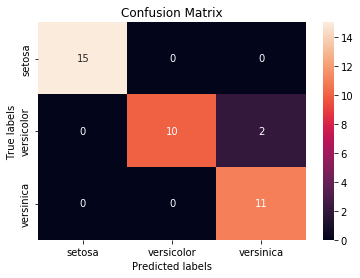

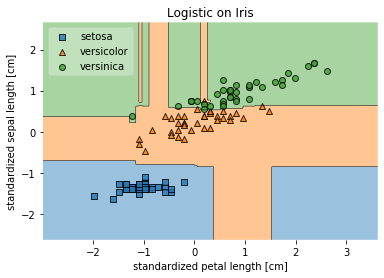

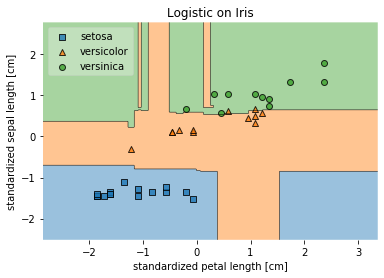

In [42]:
# ランダムフォレストを使う。
rfc = RandomForestClassifier(random_state=1234)
# 標準化したnew_X_trainとy_trainで学習する。
rfc.fit(new_X_train.astype(float), y_train.astype(float))

# 標準化したnew_X_trainからyを推定する。
y_pred = rfc.predict(new_X_test.astype(float))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(float), y_pred.astype(float))

#ヒートマップを使って可視化する。
sns.heatmap(cm, annot=True,)
ax= plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["setosa",'versicolor', 'versinica'])
ax.yaxis.set_ticklabels(["setosa",'versicolor','versinica'])

plt.show()


from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=new_X_train.astype(float),y=y_train.astype(int), clf=rfc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

ax = plot_decision_regions(X=new_X_test.astype(float),y=y_test.astype(int), clf=rfc)

plt.xlabel('standardized petal length [cm]')
plt.ylabel('standardized sepal length [cm]')
plt.title('Logistic on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ["setosa",'versicolor','versinica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

list3_5score.append(accuracy_score(y_test.astype(float), y_pred.astype(float)))
list3_5score.append(precision_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(recall_score(y_test.astype(float), y_pred.astype(float),average="macro"))
list3_5score.append(f1_score(y_test.astype(float), y_pred.astype(float),average="macro"))


,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
KNeighborsClassifier,0.921053,0.914141,0.914141,0.913043
LogisticRegression,0.894737,0.889744,0.886364,0.883838
SVC,0.947368,0.941919,0.941919,0.941919
DecisionTreeClassifier,0.894737,0.889744,0.886364,0.883838
RandomForestClassifier,0.947368,0.948718,0.944444,0.941919


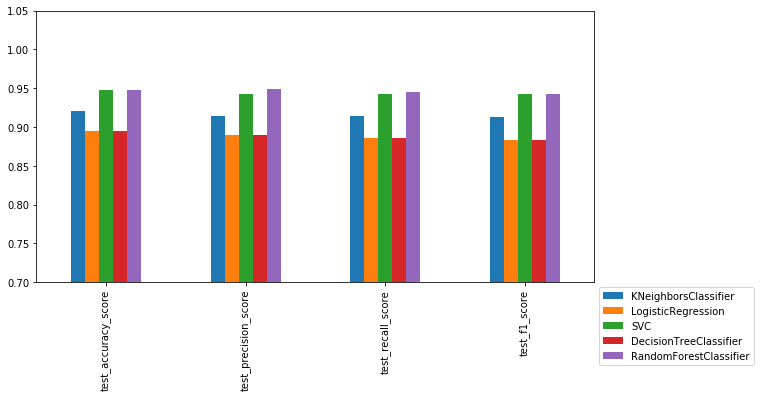

In [53]:
# list_5scoreを見やすくする
list3_5score = np.array(list3_5score)
list3_5score = list3_5score.reshape(-1,4)
names=[
    "test_accuracy_score", 
    "test_precision_score", 
    "test_recall_score", 
    "test_f1_score"]

index=[
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier"]

#pandasで表示
list3_5score = pld.DataFrame(list3_5score,columns=names,index=index)
display(list3_5score)

print("")
print("")
print("")

# 指標の推移を視覚化する。
list3_5score.T.plot(kind="bar",figsize=(10,5)) # スコア毎に棒グラフを表示
plt.legend(bbox_to_anchor=(1,0))
plt.ylim(0.7,1.05)
plt.show()


In [44]:
print("多値分類の場合はRandomForesstClassifierがよさそう。")

多値分類の場合はRandomForesstClassifierがよさそう。
